In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
from minepy import MINE

import csv


In [2]:
'''定义两个差分方程https://skccm.readthedocs.io/en/latest/quick-example.html
论文Distinguishing time-delayed causal interactions using convergent cross mapping
'''
def coupled_logistic(rx1, rx2, b12, b21, time,ts_length):
    x1 = np.zeros(ts_length)
    x2 = np.zeros(ts_length)
    
    x1[0] = 0.2
    x2[0] = 0.4

    for i in range(ts_length-1):

        x1[i+1] = x1[i] * (rx1 - rx1 * x1[i] - b21 * x2[i])
        x2[i+1] = x2[i] * (rx2 - rx2 * x2[i] - b12 * x1[i-time])

    return x1,x2
#式中，time是x1对x2影响的时间延迟

获得时滞数据

In [3]:
rx1 = 3.78 #决定了x1序列的混沌行为
rx2 = 3.77 #determines chaotic behavior of the x2 series
b12 = 0.08 #Influence of x1 on x2
b21 = 0.07 #Influence of x2 on x1
time = 7#time是x1对x2影响的时间延迟
ts_length = 1000
x1,x2 = coupled_logistic(rx1,rx2,b12,b21,time,ts_length)

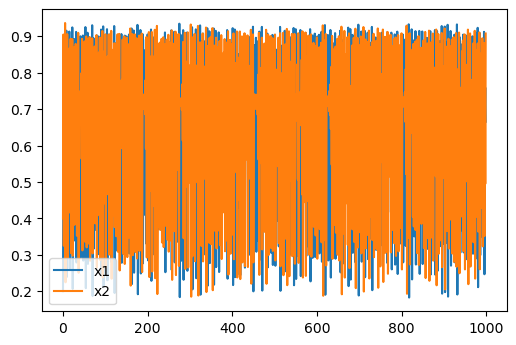

In [4]:
plt.figure(1,dpi=100)

plt.plot(x1,label = "x1")
plt.plot(x2,label = "x2")
plt.legend()
plt.show()

构建x1时间延迟数据集

In [5]:
#array改为dataframe
x_1 = pd.DataFrame(x1,columns=['x_1'])
x_2 = pd.DataFrame(x2,columns=['x_2'])
x_1.shape

(1000, 1)

In [6]:
x_2 = x_2.iloc[10:800,[0]]#原始数据
x_2 = x_2.reset_index(drop=True)#更改索引
x_2.columns=['x_2']#重命名列名
x_t = x_1.iloc[10:800,[0]]#原始数据
x_t = x_t.reset_index(drop=True)#更改索引
x_t.columns=['x_1']#重命名列名


x_t1 = x_1.iloc[9:799,[0]]
x_t1 = x_t1.reset_index(drop=True)#更改索引
x_t1.columns=['x_t1']#重命名列名

x_t2 = x_1.iloc[8:798,[0]]
x_t2 = x_t2.reset_index(drop=True)#更改索引
x_t2.columns=['x_t2']#重命名列名
x_t3 = x_1.iloc[7:797,[0]]
x_t3 = x_t3.reset_index(drop=True)#更改索引
x_t3.columns=['x_t3']#重命名列名
x_t4 = x_1.iloc[6:796,[0]]
x_t4 = x_t4.reset_index(drop=True)#更改索引
x_t4.columns=['x_t4']#重命名列名
x_t5 = x_1.iloc[5:795,[0]]
x_t5 = x_t5.reset_index(drop=True)#更改索引
x_t5.columns=['x_t5']#重命名列名
x_t6 = x_1.iloc[4:794,[0]]
x_t6 = x_t6.reset_index(drop=True)#更改索引
x_t6.columns=['x_t6']#重命名列名
x_t7 = x_1.iloc[3:793,[0]]
x_t7 = x_t7.reset_index(drop=True)#更改索引
x_t7.columns=['x_t7']#重命名列名
x_t8 = x_1.iloc[2:792,[0]]
x_t8 = x_t8.reset_index(drop=True)#更改索引
x_t8.columns=['x_t8']#重命名列名
x_t9 = x_1.iloc[1:791,[0]]
x_t9 = x_t9.reset_index(drop=True)#更改索引
x_t9.columns=['x_t9']#重命名列名
x_t10 = x_1.iloc[0:790,[0]]
x_t10 = x_t10.reset_index(drop=True)#更改索引
x_t10.columns=['x_t10']#重命名列名

data =  pd.concat([x_2,x_t,x_t1,x_t2,x_t3,x_t4,x_t5,\
                   x_t6,x_t7,x_t8,x_t9,x_t10],axis=1)

data

,x_2,x_1,x_t1,x_t2,x_t3,x_t4,x_t5,x_t6,x_t7,x_t8,x_t9,x_t10
0,0.905784,0.679782,0.239042,0.915358,0.536383,0.823538,0.337911,0.889498,0.408160,0.869851,0.599200,0.200000
1,0.292153,0.779723,0.679782,0.239042,0.915358,0.536383,0.823538,0.337911,0.889498,0.408160,0.869851,0.599200
2,0.758844,0.633287,0.779723,0.679782,0.239042,0.915358,0.536383,0.823538,0.337911,0.889498,0.408160,0.869851
3,0.669395,0.844207,0.633287,0.779723,0.679782,0.239042,0.915358,0.536383,0.823538,0.337911,0.889498,0.408160
4,0.790220,0.457594,0.844207,0.633287,0.779723,0.679782,0.239042,0.915358,0.536383,0.823538,0.337911,0.889498
...,...,...,...,...,...,...,...,...,...,...,...,...
785,0.588368,0.784887,0.680117,0.756399,0.695597,0.247276,0.912725,0.546826,0.806349,0.681480,0.739645,0.273075
786,0.875106,0.605887,0.784887,0.680117,0.756399,0.695597,0.247276,0.912725,0.546826,0.806349,0.681480,0.739645
787,0.373762,0.865503,0.605887,0.784887,0.680117,0.756399,0.695597,0.247276,0.912725,0.546826,0.806349,0.681480
788,0.855130,0.417376,0.865503,0.605887,0.784887,0.680117,0.756399,0.695597,0.247276,0.912725,0.546826,0.806349


In [7]:
# x_2 = x_2.iloc[0:80,[0]]#原始数据
# x_t = x_1.iloc[0:80,[0]]#原始数据
# x_t1 = x_1.iloc[1:81,[0]]
# x_t1 = x_t1.reset_index(drop=True)#更改索引
# x_t1.columns=['x_t1']#重命名列名

# x_t2 = x_1.iloc[2:82,[0]]
# x_t2 = x_t2.reset_index(drop=True)#更改索引
# x_t2.columns=['x_t2']#重命名列名
# x_t3 = x_1.iloc[3:83,[0]]
# x_t3 = x_t3.reset_index(drop=True)#更改索引
# x_t3.columns=['x_t3']#重命名列名
# x_t4 = x_1.iloc[4:84,[0]]
# x_t4 = x_t4.reset_index(drop=True)#更改索引
# x_t4.columns=['x_t4']#重命名列名
# x_t5 = x_1.iloc[5:85,[0]]
# x_t5 = x_t5.reset_index(drop=True)#更改索引
# x_t5.columns=['x_t5']#重命名列名
# x_t6 = x_1.iloc[6:86,[0]]
# x_t6 = x_t6.reset_index(drop=True)#更改索引
# x_t6.columns=['x_t6']#重命名列名
# x_t7 = x_1.iloc[7:87,[0]]
# x_t7 = x_t7.reset_index(drop=True)#更改索引
# x_t7.columns=['x_t7']#重命名列名
# x_t8 = x_1.iloc[8:88,[0]]
# x_t8 = x_t8.reset_index(drop=True)#更改索引
# x_t8.columns=['x_t8']#重命名列名
# x_t9 = x_1.iloc[9:89,[0]]
# x_t9 = x_t9.reset_index(drop=True)#更改索引
# x_t9.columns=['x_t9']#重命名列名
# x_t10 = x_1.iloc[10:90,[0]]
# x_t10 = x_t10.reset_index(drop=True)#更改索引
# x_t10.columns=['x_t10']#重命名列名

# data =  pd.concat([x_2,x_t,x_t1,x_t2,x_t3,x_t4,x_t5,\
#                    x_t6,x_t7,x_t8,x_t9,x_t10],axis=1)

# data

相关性分析

In [8]:
#pearson相关系数
r = data.corr()
r

,x_2,x_1,x_t1,x_t2,x_t3,x_t4,x_t5,x_t6,x_t7,x_t8,x_t9,x_t10
x_2,1.000000,-0.040821,0.029061,-0.005127,-0.006717,0.003223,-0.026902,0.062172,-0.098460,0.101600,-0.158431,0.222090
x_1,-0.040821,1.000000,-0.706912,0.466303,-0.387819,0.260807,-0.147621,0.116743,-0.092132,0.065213,-0.064193,0.051862
x_t1,0.029061,-0.706912,1.000000,-0.707127,0.465668,-0.388725,0.262607,-0.150074,0.118366,-0.094607,0.068335,-0.060929
x_t2,-0.005127,0.466303,-0.707127,1.000000,-0.706754,0.466345,-0.389574,0.264215,-0.150961,0.120087,-0.097522,0.066688
x_t3,-0.006717,-0.387819,0.465668,-0.706754,1.000000,-0.707077,0.466217,-0.390343,0.264263,-0.151850,0.122790,-0.097590
x_t4,0.003223,0.260807,-0.388725,0.466345,-0.707077,1.000000,-0.707361,0.466829,-0.390935,0.265064,-0.152769,0.120795
x_t5,-0.026902,-0.147621,0.262607,-0.389574,0.466217,-0.707361,1.000000,-0.708179,0.467626,-0.392256,0.267155,-0.149696
x_t6,0.062172,0.116743,-0.150074,0.264215,-0.390343,0.466829,-0.708179,1.000000,-0.708824,0.468342,-0.392743,0.263489
x_t7,-0.098460,-0.092132,0.118366,-0.150961,0.264263,-0.390935,0.467626,-0.708824,1.000000,-0.709484,0.470455,-0.389812
x_t8,0.101600,0.065213,-0.094607,0.120087,-0.151850,0.265064,-0.392256,0.468342,-0.709484,1.000000,-0.710293,0.466479


In [9]:
#spearman秩相关
s = data.corr('spearman')
s

,x_2,x_1,x_t1,x_t2,x_t3,x_t4,x_t5,x_t6,x_t7,x_t8,x_t9,x_t10
x_2,1.000000,-0.050411,0.029631,-0.007616,-0.001996,0.005216,-0.026839,0.067105,-0.103324,0.120997,-0.173521,0.235321
x_1,-0.050411,1.000000,-0.786034,0.516334,-0.399125,0.273632,-0.161742,0.118984,-0.095096,0.070553,-0.061564,0.054361
x_t1,0.029631,-0.786034,1.000000,-0.787357,0.516263,-0.399758,0.274608,-0.163390,0.120245,-0.096973,0.074364,-0.060709
x_t2,-0.007616,0.516334,-0.787357,1.000000,-0.786108,0.516282,-0.400132,0.275717,-0.164400,0.121860,-0.100114,0.072951
x_t3,-0.001996,-0.399125,0.516263,-0.786108,1.000000,-0.787228,0.515764,-0.400076,0.275986,-0.165082,0.124863,-0.100835
x_t4,0.005216,0.273632,-0.399758,0.516282,-0.787228,1.000000,-0.785756,0.515065,-0.399780,0.276052,-0.166922,0.124301
x_t5,-0.026839,-0.161742,0.274608,-0.400132,0.515764,-0.785756,1.000000,-0.786628,0.514866,-0.400086,0.278448,-0.165511
x_t6,0.067105,0.118984,-0.163390,0.275717,-0.400076,0.515065,-0.786628,1.000000,-0.785703,0.514714,-0.401544,0.275820
x_t7,-0.103324,-0.095096,0.120245,-0.164400,0.275986,-0.399780,0.514866,-0.785703,1.000000,-0.786436,0.517173,-0.399978
x_t8,0.120997,0.070553,-0.096973,0.121860,-0.165082,0.276052,-0.400086,0.514714,-0.786436,1.000000,-0.787744,0.514506


In [10]:
#MIC最大信息系数
list(data)
MIC = []
for var1 in list(data):
        x = data[var1]
        y = data['x_2']
        mine = MINE(alpha = 0.6, c = 15)
        mine.compute_score(x, y)
        MIC.append(mine.mic())
        print(mine.mic())

1.0000000000000002
0.1846554068488532
0.15778913013142543
0.1566630822368193
0.16374186756638437
0.15586908777523334
0.17579796894197972
0.1907838261546904
0.20915077171737162
0.2375226500056938
0.25422417206762987
0.24358002879693488


In [15]:
rx2 = r.x_2.reset_index(drop=True)#更改索引
rx2 = rx2.iloc[1:12]
rx2 = rx2.reset_index(drop=True)

sx2 = s.x_2.reset_index(drop=True)#更改索引
sx2 = sx2.iloc[1:12]
sx2 = sx2.reset_index(drop=True)

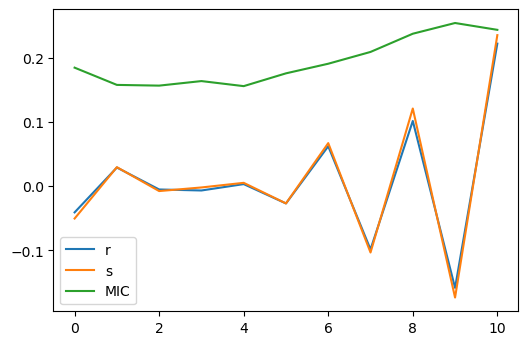

In [16]:
plt.figure(1,dpi=100)

plt.plot(rx2,label = "r")
plt.plot(sx2,label = "s")
plt.plot(MIC[1:12],label = "MIC")
plt.legend()
plt.show()